# >>M1: DATA COLLECTION

In [2]:
# import packages 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# filter warnings that can be ignored
import warnings
warnings.filterwarnings('ignore')

In [4]:
#read dataset using read_csv() 
df = pd.read_csv("city_day.csv")
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


# >>M2: PRE-PROCESSING

# Initial level of investigation on dataset

In [91]:
df.shape #dimensions of the data

(29531, 16)

In [92]:
df.columns #print the columns/features of the data

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [93]:
df.describe() #basic info of the dataset

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [94]:
df.count() #number of non null values in each column.

City          29531
Date          29531
PM2.5         24933
PM10          18391
NO            25949
NO2           25946
NOx           25346
NH3           19203
CO            27472
SO2           25677
O3            25509
Benzene       23908
Toluene       21490
Xylene        11422
AQI           24850
AQI_Bucket    24850
dtype: int64

In [8]:
df.info() #returns range, column, number of non-null objects of each column, datatype and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [9]:
#Cities in the dataset

cities = df['City'].value_counts()
print(f'Total number of cities in the dataset : {len(cities)}')
print(cities.index)

Total number of cities in the dataset : 26
Index(['Ahmedabad', 'Delhi', 'Mumbai', 'Bengaluru', 'Lucknow', 'Chennai',
       'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam', 'Amritsar',
       'Jorapokhar', 'Jaipur', 'Thiruvananthapuram', 'Amaravati',
       'Brajrajnagar', 'Talcher', 'Kolkata', 'Guwahati', 'Coimbatore',
       'Shillong', 'Chandigarh', 'Bhopal', 'Ernakulam', 'Kochi', 'Aizawl'],
      dtype='object')


# Check for the null values present in the dataset

In [10]:
df.isna().sum() #print the sum of null values for each columns

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

Selected dataframe has 16 columns. There are 14 columns that have missing values.

# Calculate total missing values and their percentage

In [11]:
total = df.isnull().sum().sort_values(ascending=False) 
total.head()

Xylene     18109
PM10       11140
NH3        10328
Toluene     8041
Benzene     5623
dtype: int64

Calculate the percent of null values for each columns (sum of null values / total non-null value) *100

In [12]:
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)  #count(returns Non-NAN value)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Xylene,18109,61.322001
PM10,11140,37.723071
NH3,10328,34.973418
Toluene,8041,27.229014
Benzene,5623,19.041008


Percent of missing value (bar plot)

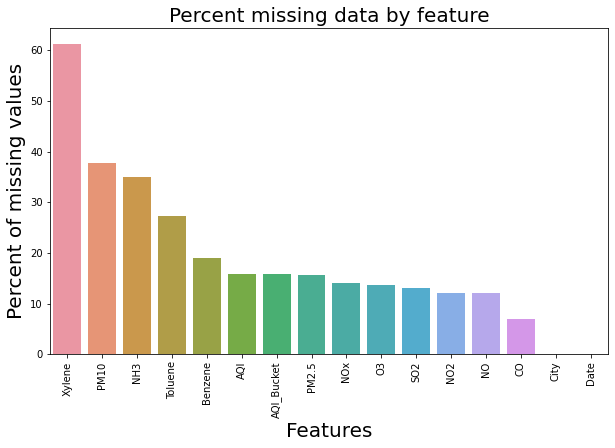

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=20)
plt.ylabel('Percent of missing values', fontsize=20)
plt.title('Percent missing data by feature', fontsize=20)
plt.xticks(rotation=90)
plt.show()

# Handling Missing Values

The column such as PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', are the ones which contribute much to our analysis. So, we need to remove null from those columns to avoid inaccuracy in the prediction. We use the Imputer from sklearn.preprocessing to fill the missing values in every column with the mean.

In [14]:
# defining columns of importance, which shall be used reguarly
COLS = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

In [15]:
from sklearn.impute import SimpleImputer
# invoking SimpleImputer to fill missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df[COLS] = imputer.fit_transform(df[COLS])

In [16]:
#Inputing AQI_Bucket value
df.fillna(method='bfill',inplace=True)
df['AQI_Bucket'] 

0                Poor
1                Poor
2                Poor
3                Poor
4                Poor
             ...     
29526            Good
29527    Satisfactory
29528    Satisfactory
29529    Satisfactory
29530            Good
Name: AQI_Bucket, Length: 29531, dtype: object

In [17]:
# checking to see if the dataset has any missing values left over and the format
print(df.isnull().sum())

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64


All the missing values are filled in.

# Outlier Detection and Handling

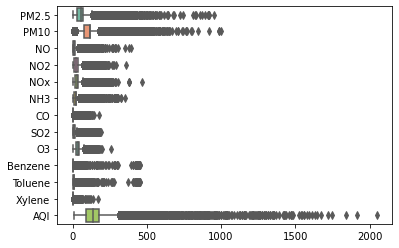

In [18]:
df1 = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']]
ax = sns.boxplot(data=df1, orient="h", palette="Set2")

In [19]:
for features in df.columns[2:-3]:
    OF_Q1 = df[features].quantile(0.25) 
    OF_Q2 = df[features].quantile(0.50)
    OF_Q3 = df[features].quantile(0.75) 
    OF_IQR = OF_Q3-OF_Q1
    OF_low_limit = OF_Q1-1.5*OF_IQR
    OF_up_limit = OF_Q3+1.5*OF_IQR
    OF_outlier= df[(df[features] < OF_low_limit ) | (df[features] > OF_up_limit )]
    df[features] = df[features].clip(OF_up_limit,OF_low_limit)
        

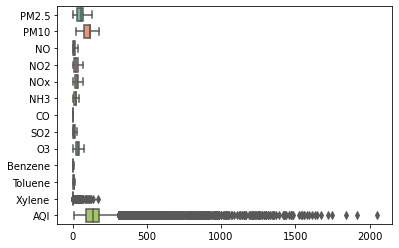

In [20]:
df1 = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']]
ax = sns.boxplot(data=df1, orient="h", palette="Set2")

As in figure, AQI and Xylene are still with Outlier Values. So we are performing Outlier Handling for AQI and Xylene.

AQI

Finding Q1,Q2 and Q3

In [21]:
Q_1=df['AQI'].quantile(0.25)
Q_2=df['AQI'].quantile(0.50)
Q_3=df['AQI'].quantile(0.75)

In [22]:
print("Q1=",Q_1)
print("Q2=",Q_2)
print("Q3=",Q_3)

Q1= 88.0
Q2= 138.0
Q3= 179.0


Finding InterQuartile Range

In [23]:
Iqr=Q_3-Q_1
Iqr

91.0

Finding Lower Limit

In [24]:
lowlimit = Q_1-1.5*Iqr
lowlimit

-48.5

Finding Upper Limit


In [25]:
uplimit = Q_3+1.5*Iqr
uplimit

315.5

Finding Outlier Data

In [26]:
AQI_outlier= df[(df['AQI'] < lowlimit ) | (df['AQI'] > uplimit )]
AQI_outlier

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29,Ahmedabad,30-01-15,79.84,118.127103,13.850000,28.6800,41.0800,23.483476,3.465,27.194943,75.715,0.040000,0.00,4.81,328.0,Very Poor
30,Ahmedabad,31-01-15,94.52,118.127103,24.390000,32.6600,52.6100,23.483476,3.465,27.194943,75.715,0.240000,0.01,7.67,514.0,Severe
31,Ahmedabad,01-02-15,132.90,118.127103,34.621824,42.0800,68.0325,23.483476,3.465,27.194943,75.715,0.400000,0.04,25.87,782.0,Severe
32,Ahmedabad,02-02-15,132.90,118.127103,34.621824,35.3100,68.0325,23.483476,3.465,27.194943,75.715,0.460000,0.06,35.61,914.0,Severe
33,Ahmedabad,03-02-15,132.90,118.127103,30.610000,28.4000,56.7300,23.483476,3.465,27.194943,73.600,0.170000,0.03,11.87,660.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28929,Visakhapatnam,08-11-18,132.90,176.345257,25.580000,41.6300,42.9500,10.070000,0.730,19.320000,43.180,5.240000,11.26,4.25,387.0,Very Poor
28985,Visakhapatnam,03-01-19,132.90,176.345257,25.440000,67.1925,68.0325,16.960000,1.380,27.194943,75.715,5.720000,9.61,4.75,319.0,Very Poor
28991,Visakhapatnam,09-01-19,132.90,176.345257,29.950000,67.1925,68.0325,15.990000,1.400,21.050000,75.715,5.140000,7.97,3.39,320.0,Very Poor
28996,Visakhapatnam,14-01-19,132.90,176.345257,20.250000,67.1925,59.2200,16.240000,1.710,27.194943,75.715,5.910000,8.06,3.12,343.0,Very Poor


Removing AQI Outlier

In [27]:
df['AQI'] = df['AQI'].clip(uplimit,lowlimit)

Xylene

Finding Q1,Q2 and Q3 For Xylene

In [28]:
Q1=df['Xylene'].quantile(0.25)
Q2=df['Xylene'].quantile(0.50)
Q3=df['Xylene'].quantile(0.75)
print("Q1=",Q1)
print("Q2=",Q2)
print("Q3=",Q3)

Q1= 2.0
Q2= 3.0701278234985114
Q3= 3.0701278234985114


Finding the Interquartile Range for Xylene

In [29]:
XIQR = Q3-Q1
XIQR

1.0701278234985114

Finding lower Limit for Xylene

In [30]:
lowerlimit = Q1-1.5*XIQR
lowerlimit

0.39480826475223285

Finding Upper Limit for Xylene

In [31]:
upperlimit = Q3+1.5*XIQR
upperlimit

4.675319558746279

Finding Outlier Data For Xylene

In [32]:
Xoutlier= df[(df['Xylene'] < lowerlimit ) | (df['Xylene'] > upperlimit )]
Xoutlier

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-15,67.450578,118.127103,0.920000,18.22,17.1500,23.483476,0.920000,27.194943,75.715,0.00,0.02,0.00,166.463581,Poor
6,Ahmedabad,07-01-15,67.450578,118.127103,34.621824,40.62,68.0325,23.483476,3.465000,27.194943,33.470,0.00,0.00,0.00,166.463581,Poor
7,Ahmedabad,08-01-15,67.450578,118.127103,34.621824,36.74,68.0325,23.483476,3.465000,27.194943,31.890,0.00,0.00,0.00,166.463581,Poor
8,Ahmedabad,09-01-15,67.450578,118.127103,29.160000,31.00,48.0000,23.483476,3.465000,27.194943,25.750,0.00,0.00,0.00,166.463581,Poor
9,Ahmedabad,10-01-15,67.450578,118.127103,17.574730,7.04,0.0000,23.483476,2.248598,8.290000,4.550,0.00,0.00,0.00,166.463581,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29427,Visakhapatnam,20-03-20,23.970000,67.960000,11.370000,35.13,27.9300,11.380000,0.870000,11.120000,37.460,5.28,12.72,5.73,91.000000,Satisfactory
29485,Visakhapatnam,17-05-20,6.300000,21.096846,1.090000,12.21,7.0700,7.400000,0.110000,8.560000,17.140,0.86,6.90,0.29,23.000000,Good
29527,Visakhapatnam,28-06-20,24.380000,74.090000,3.420000,26.06,16.5300,11.990000,0.520000,12.720000,30.140,0.74,2.21,0.38,70.000000,Satisfactory
29528,Visakhapatnam,29-06-20,22.910000,65.730000,3.450000,29.53,18.3300,10.710000,0.480000,8.420000,30.960,0.01,0.01,0.00,68.000000,Satisfactory


Removing Xylene Outlier

In [33]:
df['Xylene'] = df['Xylene'].clip(upperlimit,lowerlimit)

Rechecking Outliers

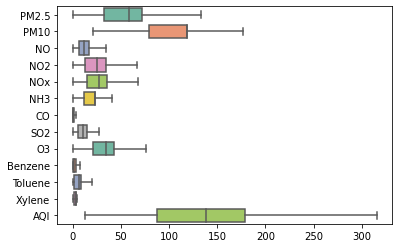

In [34]:
df1 = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']]
ax = sns.boxplot(data=df1, orient="h", palette="Set2")

ALL OUTLIERS ARE REMOVED!!

# Encoding

In [35]:
df['AQI_Bucket'].value_counts()

Moderate        10295
Satisfactory    10237
Poor             3248
Very Poor        2628
Good             1610
Severe           1513
Name: AQI_Bucket, dtype: int64

In [36]:
encoding = {'Good':6,'Satisfactory':5,'Moderate':4,'Poor':3,'Very Poor':2,'Severe':1}
df['AQI_Bucket'] = df['AQI_Bucket'].replace(encoding)
df['AQI_Bucket']

0        3
1        3
2        3
3        3
4        3
        ..
29526    6
29527    5
29528    5
29529    5
29530    6
Name: AQI_Bucket, Length: 29531, dtype: int64

In [37]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-15,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.920,27.194943,75.715,0.00,0.02,0.394808,166.463581,3
1,Ahmedabad,02-01-15,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.970,24.550000,34.060,3.68,5.50,3.770000,166.463581,3
2,Ahmedabad,03-01-15,67.450578,118.127103,17.40,19.30,29.70,23.483476,3.465,27.194943,30.700,6.80,16.40,2.250000,166.463581,3
3,Ahmedabad,04-01-15,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.700,18.590000,36.080,4.43,10.14,1.000000,166.463581,3
4,Ahmedabad,05-01-15,67.450578,118.127103,22.10,21.42,37.76,23.483476,3.465,27.194943,39.310,7.01,18.89,2.780000,166.463581,3


In [38]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df.City=le.fit_transform(df.City)
df.Date=le.fit_transform(df.Date)
df.AQI_Bucket=le.fit_transform(df.AQI_Bucket)

In [39]:
df.describe()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
count,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,12.888592,1007.806407,60.125121,107.566557,14.233758,26.968468,28.951549,20.851662,1.206492,11.890671,33.718880,2.250422,6.716823,2.599443,152.729235,3.014019
std,7.587015,580.188590,34.874382,41.386046,10.131566,17.351398,18.876389,10.570840,0.941782,7.250163,17.676668,2.185328,5.922055,1.207735,81.991592,1.221328
min,0.000000,0.000000,0.040000,21.096846,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.394808,13.000000,0.000000
25%,6.000000,506.000000,32.150000,79.315000,6.210000,12.980000,14.670000,12.040000,0.540000,6.090000,20.740000,0.240000,1.280000,2.000000,88.000000,2.000000
50%,14.000000,1010.000000,58.030000,118.127103,11.530000,25.240000,27.550000,23.483476,0.950000,10.480000,34.491430,1.840000,6.930000,3.070128,138.000000,3.000000
75%,20.000000,1511.000000,72.450000,118.127103,17.574730,34.665000,36.015000,23.483476,1.710000,14.531977,42.730000,3.280840,8.700972,3.070128,179.000000,4.000000
max,25.000000,2008.000000,132.900000,176.345257,34.621824,67.192500,68.032500,40.648690,3.465000,27.194943,75.715000,7.842101,19.832430,4.675320,315.500000,5.000000


# Feature Reduction

In [40]:
df.corr()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
City,1.000000,0.000869,0.061417,-0.016447,0.061702,-0.034002,0.007026,-0.209625,-0.192713,0.008976,-0.003305,-0.020497,0.003080,-0.037681,-0.023490,0.100369
Date,0.000869,1.000000,-0.010732,-0.017608,-0.005859,-0.004057,-0.008168,-0.003375,-0.010974,-0.000249,-0.005326,-0.001387,-0.005431,-0.000122,-0.013628,0.013291
PM2.5,0.061417,-0.010732,1.000000,0.675593,0.445888,0.436076,0.434471,0.338228,0.299084,0.257631,0.208712,0.172375,0.196428,0.050087,0.837849,-0.734617
PM10,-0.016447,-0.017608,0.675593,1.000000,0.418935,0.421199,0.420906,0.358488,0.244187,0.297238,0.223841,0.178905,0.205240,0.047033,0.644082,-0.574577
NO,0.061702,-0.005859,0.445888,0.418935,1.000000,0.508010,0.739788,0.275933,0.276474,0.338338,-0.031839,0.209174,0.222996,0.048554,0.480921,-0.435963
NO2,-0.034002,-0.004057,0.436076,0.421199,0.508010,1.000000,0.602880,0.361261,0.225996,0.298309,0.308860,0.253733,0.325645,0.054867,0.474620,-0.444236
NOx,0.007026,-0.008168,0.434471,0.420906,0.739788,0.602880,1.000000,0.246804,0.272556,0.287530,0.057416,0.249209,0.274576,0.059547,0.471735,-0.419030
NH3,-0.209625,-0.003375,0.338228,0.358488,0.275933,0.361261,0.246804,1.000000,0.160798,0.060975,0.149557,0.014599,0.055525,-0.035816,0.327011,-0.293535
CO,-0.192713,-0.010974,0.299084,0.244187,0.276474,0.225996,0.272556,0.160798,1.000000,0.299532,0.040019,0.223971,0.328570,0.166456,0.486975,-0.538321
SO2,0.008976,-0.000249,0.257631,0.297238,0.338338,0.298309,0.287530,0.060975,0.299532,1.000000,0.202088,0.155857,0.324499,0.064991,0.368316,-0.345646


<AxesSubplot:>

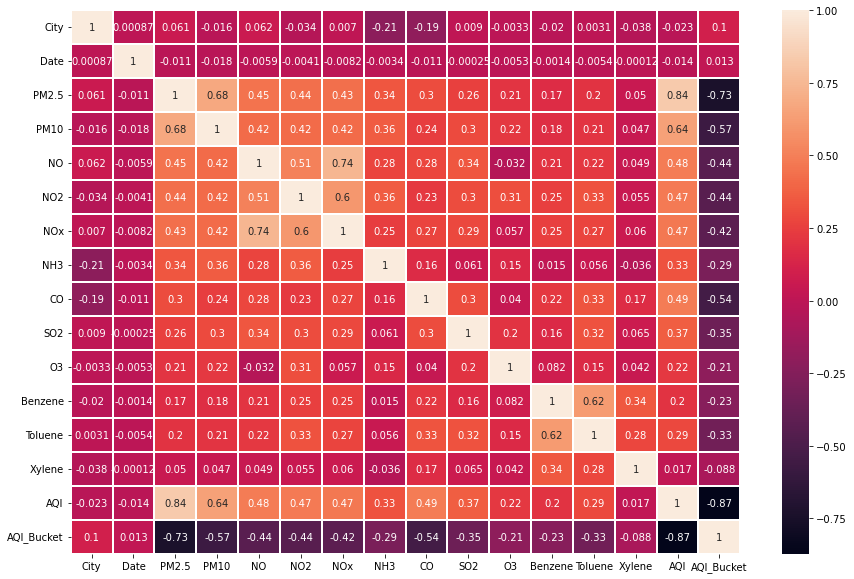

In [41]:
from sklearn import preprocessing
corrmet = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corrmet,annot=True,linewidth=.2)

In [42]:
df['BTX']=df['Benzene']+df['Toluene']+df['Xylene']
x = df.drop(['Benzene', 'Toluene', 'Xylene'],axis=1)

In [43]:
x.describe()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,BTX
count,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,12.888592,1007.806407,60.125121,107.566557,14.233758,26.968468,28.951549,20.851662,1.206492,11.890671,33.718880,152.729235,3.014019,11.566688
std,7.587015,580.188590,34.874382,41.386046,10.131566,17.351398,18.876389,10.570840,0.941782,7.250163,17.676668,81.991592,1.221328,7.944810
min,0.000000,0.000000,0.040000,21.096846,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,13.000000,0.000000,0.394808
25%,6.000000,506.000000,32.150000,79.315000,6.210000,12.980000,14.670000,12.040000,0.540000,6.090000,20.740000,88.000000,2.000000,4.704808
50%,14.000000,1010.000000,58.030000,118.127103,11.530000,25.240000,27.550000,23.483476,0.950000,10.480000,34.491430,138.000000,3.000000,11.771100
75%,20.000000,1511.000000,72.450000,118.127103,17.574730,34.665000,36.015000,23.483476,1.710000,14.531977,42.730000,179.000000,4.000000,15.051940
max,25.000000,2008.000000,132.900000,176.345257,34.621824,67.192500,68.032500,40.648690,3.465000,27.194943,75.715000,315.500000,5.000000,32.349851


# Feature Engineering

In [44]:
from sklearn.model_selection import train_test_split

x = df.drop("AQI_Bucket",axis=1)
y = df["AQI_Bucket"]

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.20,random_state=0)

# Standardisation

In [96]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

# >>M3: EXPLORATORY DATA ANALYSIS (EDA)

# 1.Univariate Analysis

Text(0.5, 1.0, 'AQI')

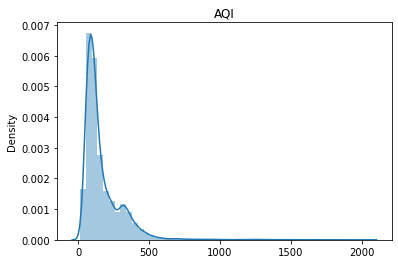

In [97]:
sns.distplot(x=df['AQI'])
plt.title('AQI')

Text(0.5, 1.0, 'Particular Matter 2.5')

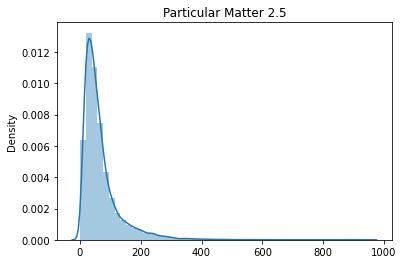

In [98]:
sns.distplot(x=df['PM2.5'])
plt.title('Particular Matter 2.5')

Text(0.5, 1.0, 'CO')

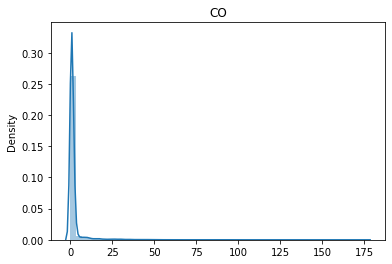

In [99]:
sns.distplot(x=df['CO'])
plt.title('CO')

# 2. Bi-Variate Analysis

Text(0.5, 1.0, 'AQI Bucket v/s AQI')

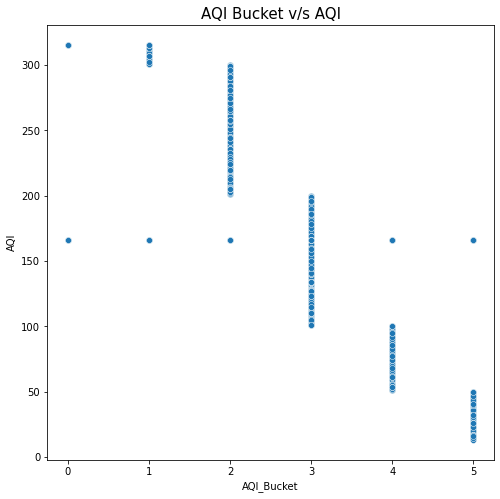

In [50]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='AQI_Bucket',y='AQI',data=df)
plt.title('AQI Bucket v/s AQI',size=15)

Text(0.5, 1.0, 'Co-relation of BTX')

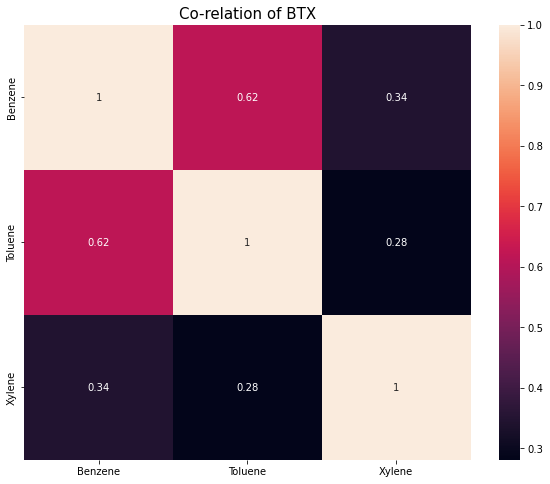

In [51]:
plt.subplots(figsize=(10,8))
corr1=df[['Benzene','Toluene','Xylene']].corr()
sns.heatmap(corr1,annot=True)
plt.title('Co-relation of BTX',size=15)

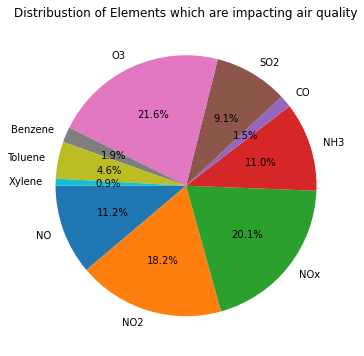

In [100]:
#Distribustion of Elements which are impacting air quality
Elements = ['NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
Elements_whichimpacting_airquality = df[Elements].copy()
element_df = Elements_whichimpacting_airquality.sum()
plt.figure(figsize=(12,6))
plt.title('Distribustion of Elements which are impacting air quality')
plt.pie(element_df, labels=element_df.index, autopct='%1.1f%%', startangle=180);

# >> M4: MODELLING

Linear Regression

In [52]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,Y_train)
predictions=model.predict(X_test)

In [56]:
from sklearn.metrics import mean_squared_error
print("MSE: ",mean_squared_error(Y_test,predictions))
from sklearn.metrics import r2_score
print("R square value: ",r2_score(Y_test,predictions))
from sklearn.metrics import confusion_matrix,accuracy_score

MSE:  0.13306246825799897
R square value:  0.9093634049375596


Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
logit_model=LogisticRegression()
logit_model.fit(X_train,Y_train)
y_pred = logit_model.predict(X_test)

In [108]:
print("MSE: ",mean_squared_error(Y_test,predictions))
print("R square value: ",r2_score(Y_test,predictions))

MSE:  0.3220240084074237
R square value:  0.7806506971310972


In [109]:
print('Accuracy is',accuracy_score(Y_test,y_pred))
print('Precision is',precision_score(Y_test,y_pred,average='macro'))
print('Recall is',recall_score(Y_test,y_pred,average='macro'))
print('F1 score is',f1_score(Y_test,y_pred,average='macro'))

Accuracy is 0.7081428813272389
Precision is 0.7295968516154119
Recall is 0.6036981804628542
F1 score is 0.6298625900852141


Decision Tree 

In [57]:
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor()
dt_model.fit(X_train, Y_train)
predictions=dt_model.predict(X_test)

In [58]:
print("MSE: ",mean_squared_error(Y_test,predictions))
print("R square value: ",r2_score(Y_test,predictions))
print("Accuracy is: ", accuracy_score(Y_test,predictions))

MSE:  0.13695615371593026
R square value:  0.9067111890515085
Accuracy is:  0.9285593363805654


Random Forest 

In [59]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, Y_train)
predictions=reg_rf.predict(X_test)

In [60]:
print("MSE: ",mean_squared_error(Y_test,predictions))
print("R square value: ",r2_score(Y_test,predictions))

MSE:  0.0793820551887591
R square value:  0.9459282599702163


KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier
Knn_cl=KNeighborsClassifier()
Knn_cl.fit(X_train,Y_train)
predictions = Knn_cl.predict(X_test)

In [62]:
print("MSE: ",mean_squared_error(Y_test,predictions))
print("R square value: ",r2_score(Y_test,predictions))

MSE:  0.3158963941086846
R square value:  0.7848245720273361


Gradient Boosting

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,Y_train)
predictions=gb.predict(X_test)

In [87]:
print("MSE: ",mean_squared_error(Y_test,predictions))
print("R square value: ",r2_score(Y_test,predictions))
print("Accuracy is: ", accuracy_score(Y_test,predictions))

MSE:  0.11427120365667852
R square value:  0.9221632294311103
Accuracy is:  0.9378703233451837


# >> M5: MODEL FINE TUNING

Since, All the Modelling is not accurate ,We can increase the accuracy and other factors.for that wedo Fine -Tuning for All the Models

Here ,we are using Hyper-Parameter Technique in Fine Tuning.

Linear Regression

In [65]:
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [101]:
from sklearn import linear_model
lr=linear_model.LinearRegression(normalize= False,n_jobs=None)
model=lr.fit(X_train,Y_train)
predictions=model.predict(X_test)

In [103]:
print("MSE: ",mean_squared_error(Y_test,predictions))
print("R square value: ",r2_score(Y_test,predictions))

MSE:  0.3220240084074237
R square value:  0.7806506971310972


Logistic Regression

In [110]:
logit_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
logit_model=LogisticRegression(random_state=42,warm_start=False)
logit_model.fit(X_train,Y_train)
y_pred = logit_model.predict(X_test)

In [114]:
print("MSE: ",mean_squared_error(Y_test,predictions))
print("R square value: ",r2_score(Y_test,predictions))

MSE:  0.3220240084074237
R square value:  0.7806506971310972


In [115]:
print('Accuracy is',accuracy_score(Y_test,y_pred))
print('Precision is',precision_score(Y_test,y_pred,average='macro'))
print('Recall is',recall_score(Y_test,y_pred,average='macro'))
print('F1 score is',f1_score(Y_test,y_pred,average='macro'))

Accuracy is 0.7081428813272389
Precision is 0.7295968516154119
Recall is 0.6036981804628542
F1 score is 0.6298625900852141


Decision Tree

In [68]:
dt_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [69]:
from sklearn.tree import DecisionTreeRegressor
dt_model1=DecisionTreeRegressor(max_depth=50,random_state=42,criterion= 'mse')
dt_model1.fit(X_train,Y_train)
predictions=dt_model1.predict(X_test)

In [70]:
print("MSE: ",mean_squared_error(Y_test,predictions))
print("R square value: ",r2_score(Y_test,predictions))
print("Accuracy is: ", accuracy_score(Y_test,predictions))

MSE:  0.13018452683257153
R square value:  0.9113237384185539
Accuracy is:  0.9302522431014051


Random Forest

In [71]:
reg_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [72]:
from sklearn.ensemble import RandomForestRegressor
reg_rf1=RandomForestRegressor(n_estimators = 1000, max_features='auto',oob_score = True,n_jobs = 1,random_state =1)  
reg_rf1.fit(X_train,Y_train)
predictions=reg_rf1.predict(X_test)

In [73]:
print("MSE: ",mean_squared_error(Y_test,predictions))
print("R square value: ",r2_score(Y_test,predictions))


MSE:  0.07929538124259354
R square value:  0.9459872986417811


KNN

In [74]:
Knn_cl.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [75]:
Knn_cl1=KNeighborsClassifier(metric='minkowski',p= 2)
Knn_cl1.fit(X_train,Y_train)
predictions = Knn_cl.predict(X_test)

In [76]:
print("MSE: ",mean_squared_error(Y_test,predictions))
print("R square value: ",r2_score(Y_test,predictions))
print("Accuracy is: ", accuracy_score(Y_test,predictions))

MSE:  0.3158963941086846
R square value:  0.7848245720273361
Accuracy is:  0.7795835449466735


Gradient Boosting

In [77]:
gb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [78]:
gb1=GradientBoostingClassifier(n_estimators=150, subsample=1, criterion='friedman_mse', min_samples_split=3)
gb1.fit(X_train,Y_train)
predictions=gb.predict(X_test)

In [79]:
print("MSE: ",mean_squared_error(Y_test,predictions))
print("R square value: ",r2_score(Y_test,predictions))
print("Accuracy is: ", accuracy_score(Y_test,predictions))

MSE:  0.11427120365667852
R square value:  0.9221632294311103
Accuracy is:  0.9378703233451837


> Applying some of the hyper parameters to the model, there is an increase in the overall performance of the model!!